<a target="_blank" href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/05%20-%20Clustering/walkthrough/solutions/walkthrough_05.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<h1 align="center"> Walkthrough - Lab 5</h1>

<div>
<td> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

![clustering image](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

### Clustering
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

### KMeans Clustering 
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

### About the dataset
This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


## K-MEANS CLUSTERING

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## DATA EXPLORATION

In [2]:
df = pd.read_csv("https://github.com/michalis0/Business-Intelligence-and-Analytics/raw/master/data/mall_customers.csv", index_col="CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Checking for null values

In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

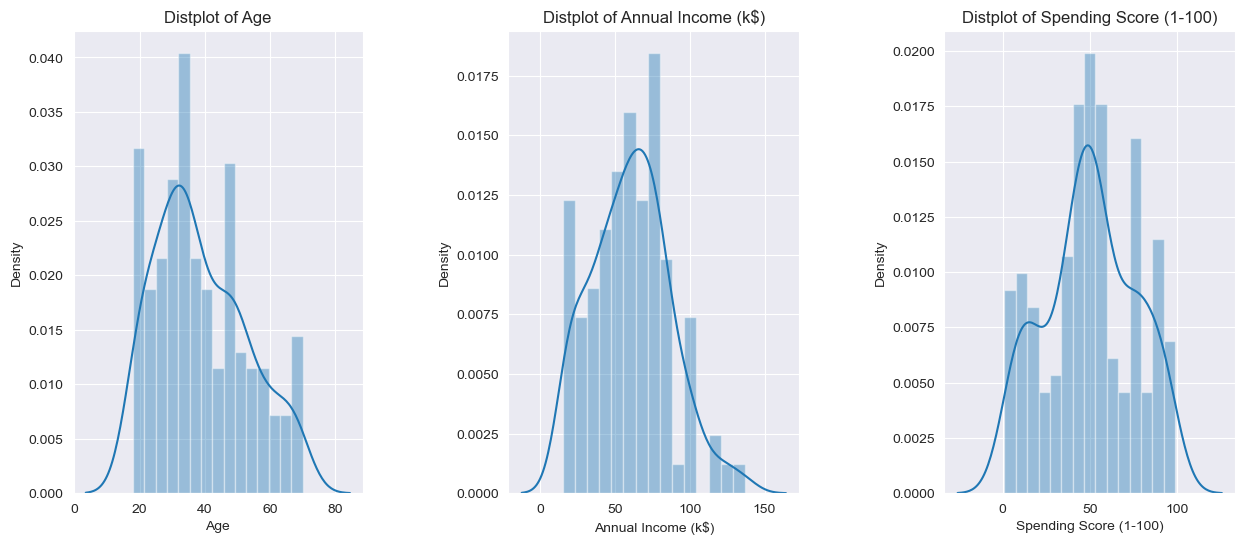

In [7]:
# See the distribution of the data of the main components
plt.figure(1 , figsize = (15 , 6))
n = 0 

# Plot each column of the data frame in a separate subplot
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

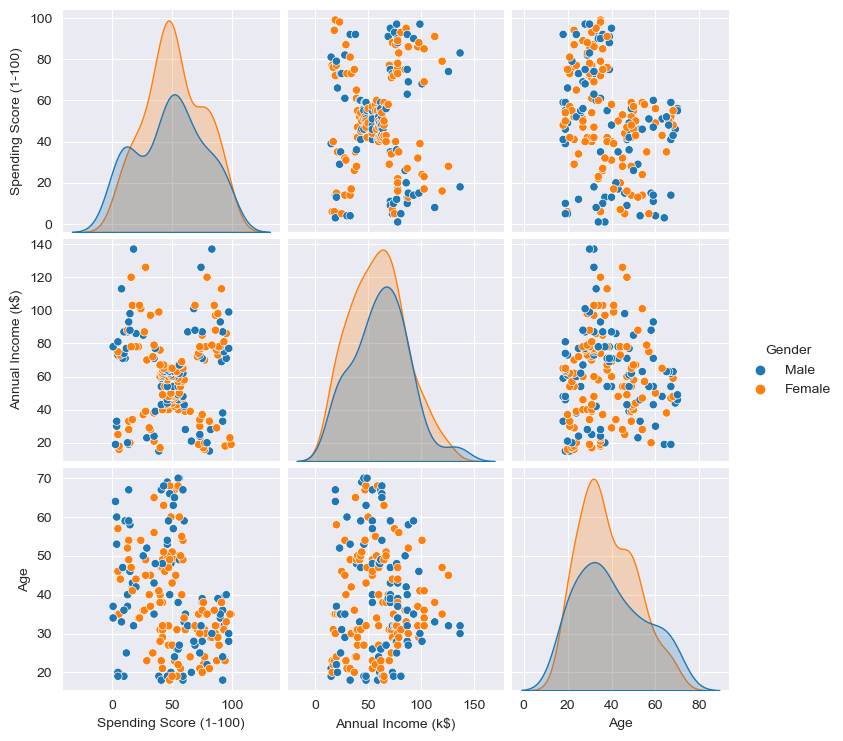

In [8]:
# Pairplots allow us to see the distribution of each variable and the relationship between each pair of variables
# We can also see the distribution of each variable on the diagonal
# We can also color the data points by a categorical variable
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

## 2D CLUSTERING BASED ON AGE AND SPENDING SCORE

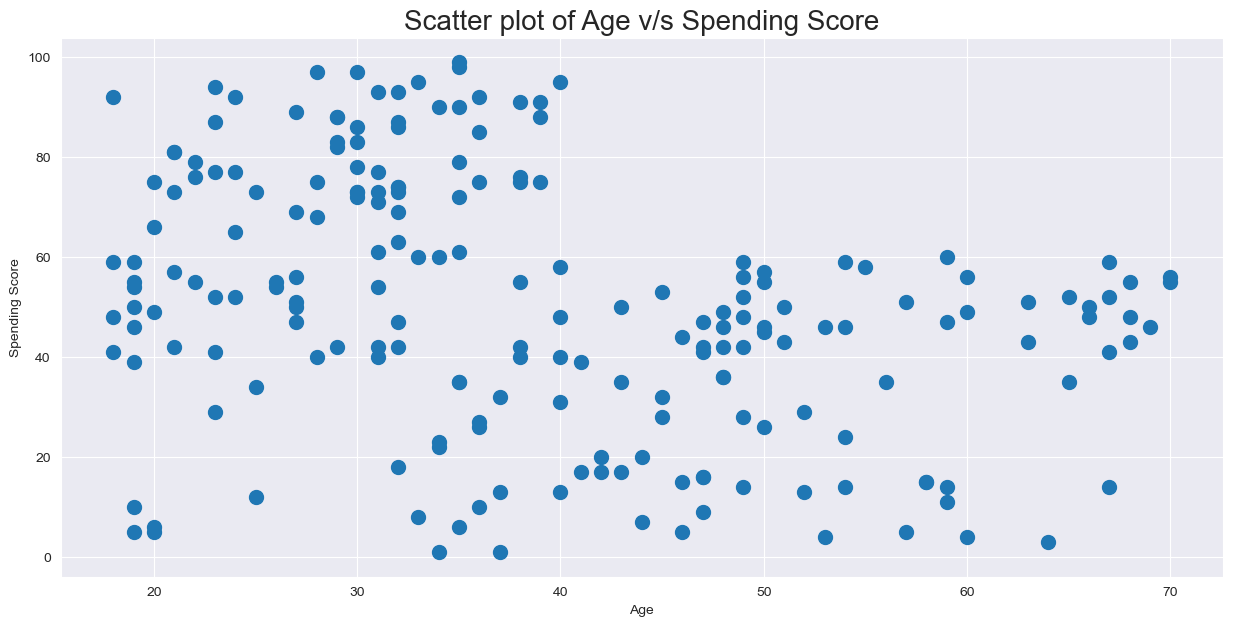

In [9]:
# Scatter plot of Age v/s Spending Score without any clustering
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

#### Deciding K value

- Iterate over the number of clusters and calculate the inertia
- Inertia is the sum of squared distances of samples to their closest cluster center
- We will use the elbow method to find the optimal number of clusters
- The optimal number of clusters is the point after which the inertia starts decreasing in a linear fashion

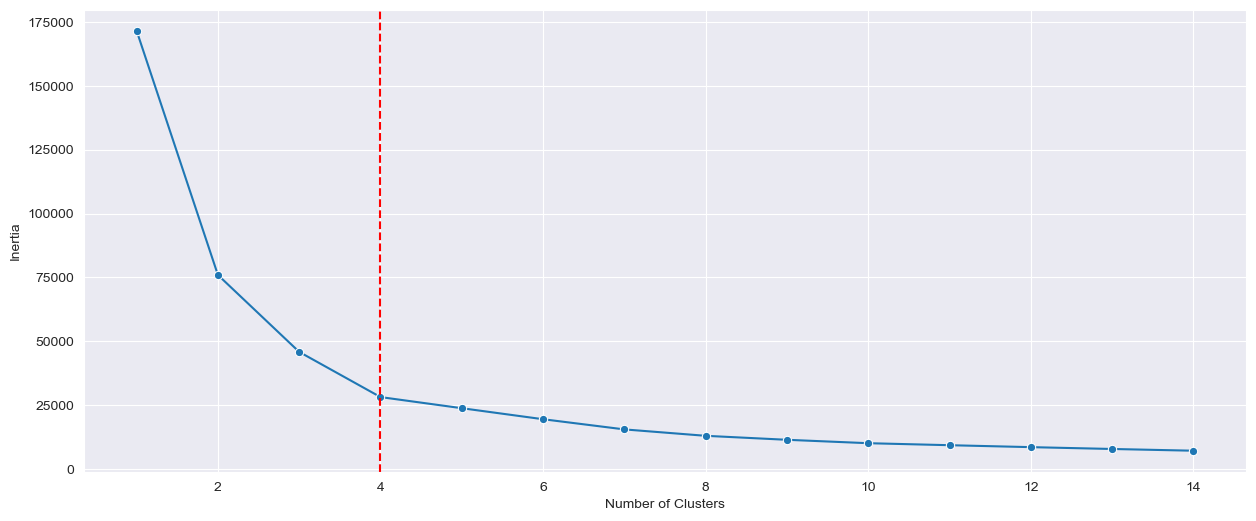

In [10]:
# Elbow method to find the optimal number of clusters
X_2D = df[['Age' , 'Spending Score (1-100)']].values
inertia = []
NB_ITER = 15
for n in range(1 , NB_ITER):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=50, max_iter=300, random_state= 111)
    algorithm.fit(X_2D)
    inertia.append(algorithm.inertia_)

# Plot vertical line at the point of maximum curvature
plt.figure(1 , figsize = (15 ,6))
sns.lineplot(x = np.arange(1 , NB_ITER), y = inertia, sort = False, marker='o')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.axvline(x=4, color='r', linestyle='--')
plt.show()

From the previous Elbow plot, we can see that the best number of cluster appear to be 4. So we will use this in the following section.

In [11]:
algorithm = KMeans(n_clusters=4, init='k-means++', n_init=50 ,max_iter=300, random_state= 111)
algorithm.fit(X_2D)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [12]:
# Print the labels and the centroids
# The labels are the cluster numbers assigned to each data point
print(labels1)

[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [13]:
# Print the centroids coordinates
print(centroids1)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


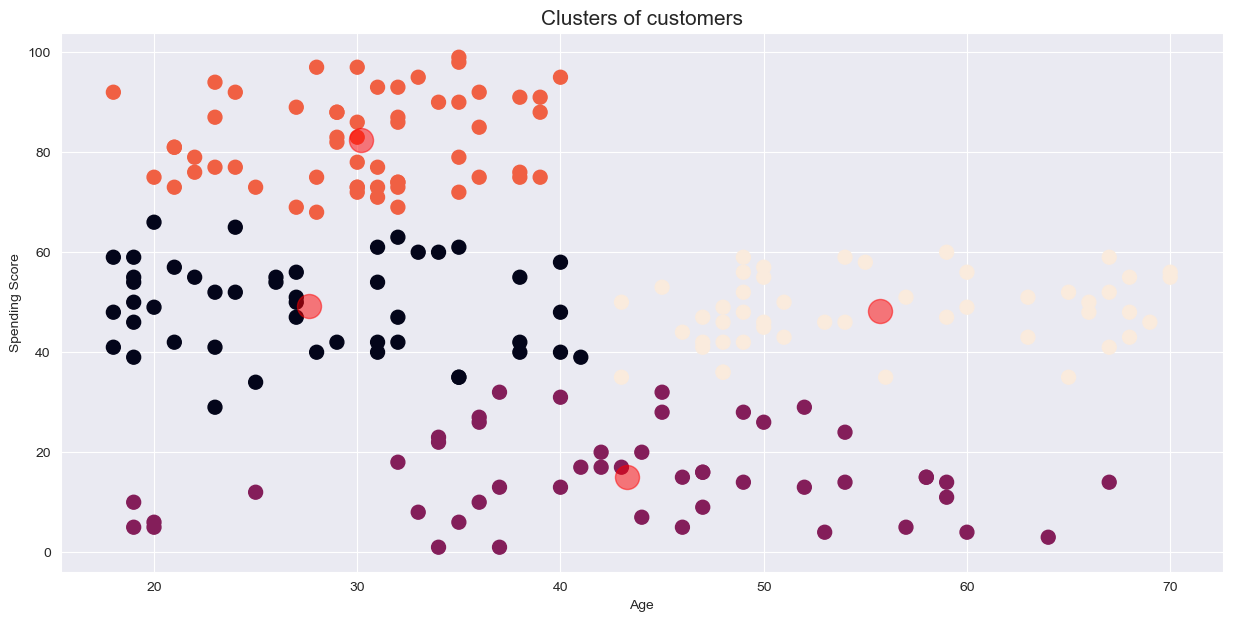

In [14]:
# Create a scatter plot of the data colored by the cluster labels
plt.figure(1 , figsize = (15 , 7))

# Scatter plot with bright colors
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100, c = algorithm.labels_)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.title('Clusters of customers', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [15]:
# This code creates a mesh grid of the data points found in X_2D[:, 0] and X_2D[:, 1] with a step size of h (in this case 0.02).
# The mesh grid is then used to predict the output of the algorithm for each point on the grid.
# The result is stored in the Z variable.

h = 0.02

# Get the minimum and maximum values of the data
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1

# Create a mesh grid of all the points in the plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the predict method of the algorithm to predict the output for all the points in the mesh grid.
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

# NOTE :
# np.c_ is a NumPy function used to concatenate two arrays along the second axis.
# It takes two arrays and returns an array combining them along the second axis.
# In this case, it combines the two arrays xx.ravel() and yy.ravel() along the second axis, which is the column axis.
# The result is an array of two columns, which is then used by the algorithm.predict() method to predict the output for each point on the mesh grid.

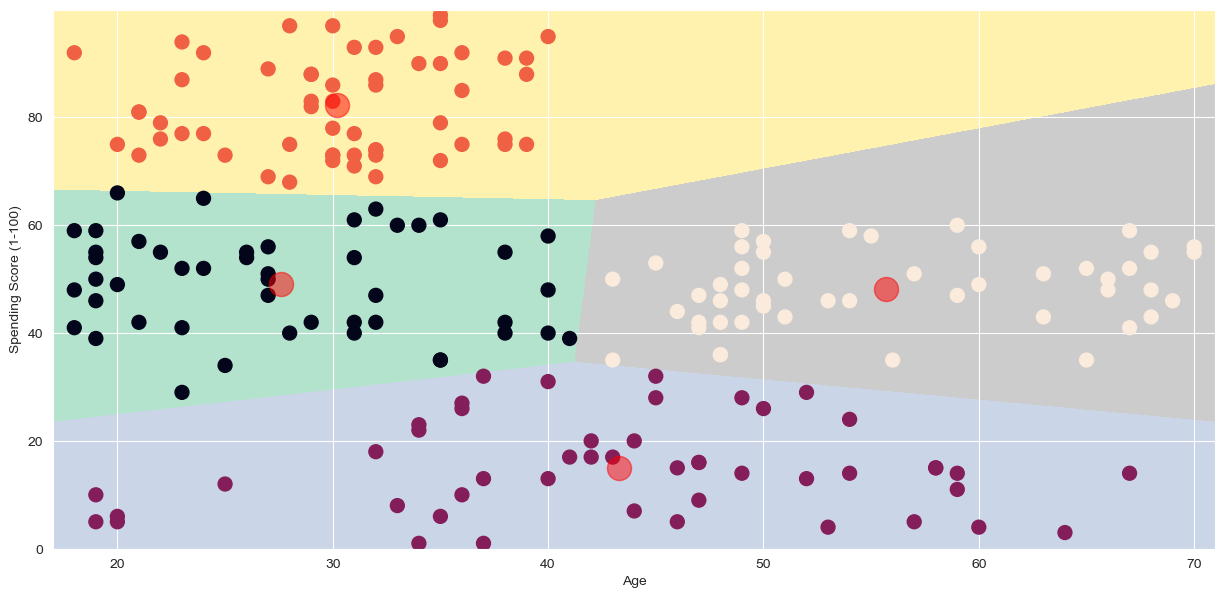

In [16]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## 3D CLUSTERING AGE, ANNUAL INCOME AND SPENDING INCOME

We can generalize the previous method for more than 2 dimensions. Howver, visual interpreation will become harder in 3d and impossible in 4+ dimensions.
In this part, we will first work with the same example as before but we will take into account one more feature, mainly the annual income 

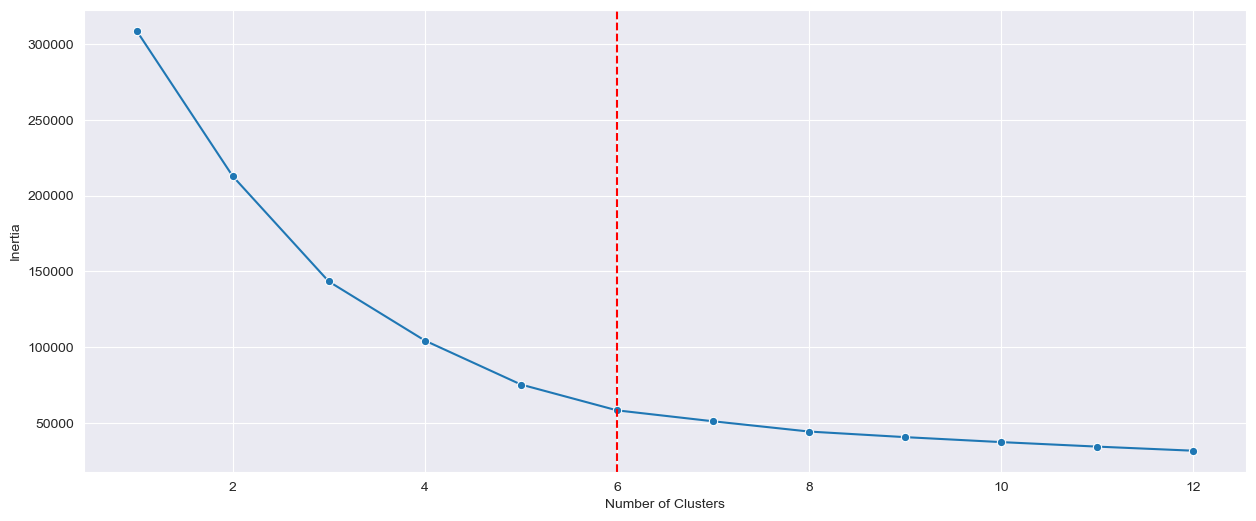

In [17]:
# Elbow method to find the optimal number of clusters
X_3D = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].values
inertia = []
NB_ITER = 13
for n in range(1 , NB_ITER):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=50, max_iter=300, random_state= 111)
    algorithm.fit(X_3D)
    inertia.append(algorithm.inertia_)

# Plot vertical line at the point of maximum curvature
plt.figure(1 , figsize = (15 ,6))
sns.lineplot(x = np.arange(1 , NB_ITER), y = inertia, sort = False, marker='o')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.axvline(x=6, color='r', linestyle='--')
plt.show()

In [18]:
algorithm = KMeans(n_clusters=6 ,init='k-means++', n_init = 10 ,max_iter=300, random_state= 111)
algorithm.fit(X_3D)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X_3D)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,5.0
2,Male,21,15,81,4.0
3,Female,20,16,6,5.0
4,Female,23,16,77,4.0
5,Female,31,17,40,5.0


In [19]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,5.0
2,Male,21,15,81,4.0
3,Female,20,16,6,5.0
4,Female,23,16,77,4.0
5,Female,31,17,40,5.0


## YOUR TURN :
## 2D CLUSTERING BASED ON ANNUAL INCOME AND SPENDING SCORE

> Based on the previous examples, you should now perform the following tasks:
> 1. Perform K-Means clustering for mutliple number of clusters using the following features:
>     - 'Annual Income (k$)'
>     - 'Spending Score (1-100)'.
>
> 2. Plot the inertia for each number of clusters and use the elbow method to find the optimal number of clusters.
>
> 3. Use the optimal number of clusters to perform K-Means clustering on the data set and plot the clusters. (no need to perform a mesh grid : a scatter plot is enough)
>

### MOODLE QUIZ - QUESTION 1
> **Replace all the ... with the appropriate value obtained previously (just below each TODO annotation)**

##### QUESTION 1.1 - GET THE DATA USED FOR TRAINING

In [21]:
# Elbow method to find the optimal number of clusters
# TODO: Get the data from the dataframe with the following columns: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']].values

##### QUESTION 1.2 - TRAIN CLUSTERING WITH UP TO 15 CLUSTERS

In [22]:
inertia = []
NB_ITER = 15
for n in range(1 , NB_ITER):
    # TODO: Create a KMeans object with the following parameters: n_clusters=n, init='k-means++', n_init=50, max_iter=300, random_state=111
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=50, max_iter=300, random_state= 111)
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

##### QUESTION 1.3 - PLOT INERTIA AND DETERMINE BEST VALUE OF NB_CLUSTERS

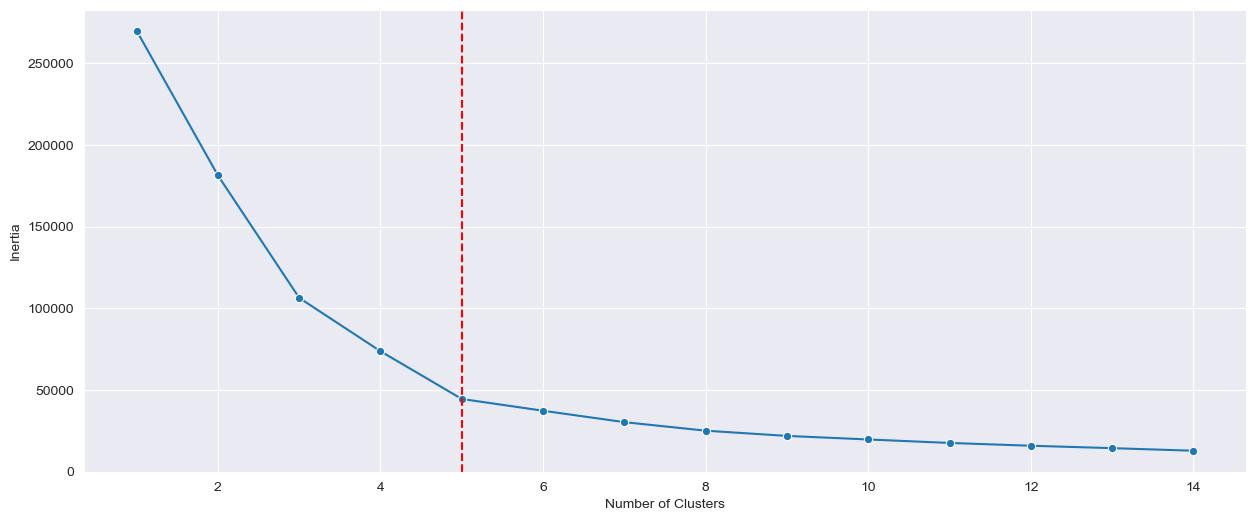

In [23]:
# Plot vertical line at the point of maximum curvature
plt.figure(1 , figsize = (15 ,6))
# TODO: Plot the inertia values and add a vertical line at the point of maximum curvature you find
sns.lineplot(x = np.arange(1 , NB_ITER), y = inertia, sort = False, marker='o')
# TODO: Add a vertical line at the point of maximum curvature
plt.axvline(x=5, color='r', linestyle='--')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [24]:
# Replace the ... with the appropriate value obtained previously
NB_CLUSTERS = 5

#### APPLYING K-MEANS

In [25]:
algorithm = (KMeans(n_clusters=NB_CLUSTERS ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [26]:
# Print the labels and the centroids
# The labels are the cluster numbers assigned to each data point
print(labels)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [27]:
# Print the centroids coordinates
print(centroids)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


##### QUESTION 1.4 - DO A SCATTER PLOT OF ALL POINTS WITH DIFFERENT COLORS FOR EACH CLUSTER

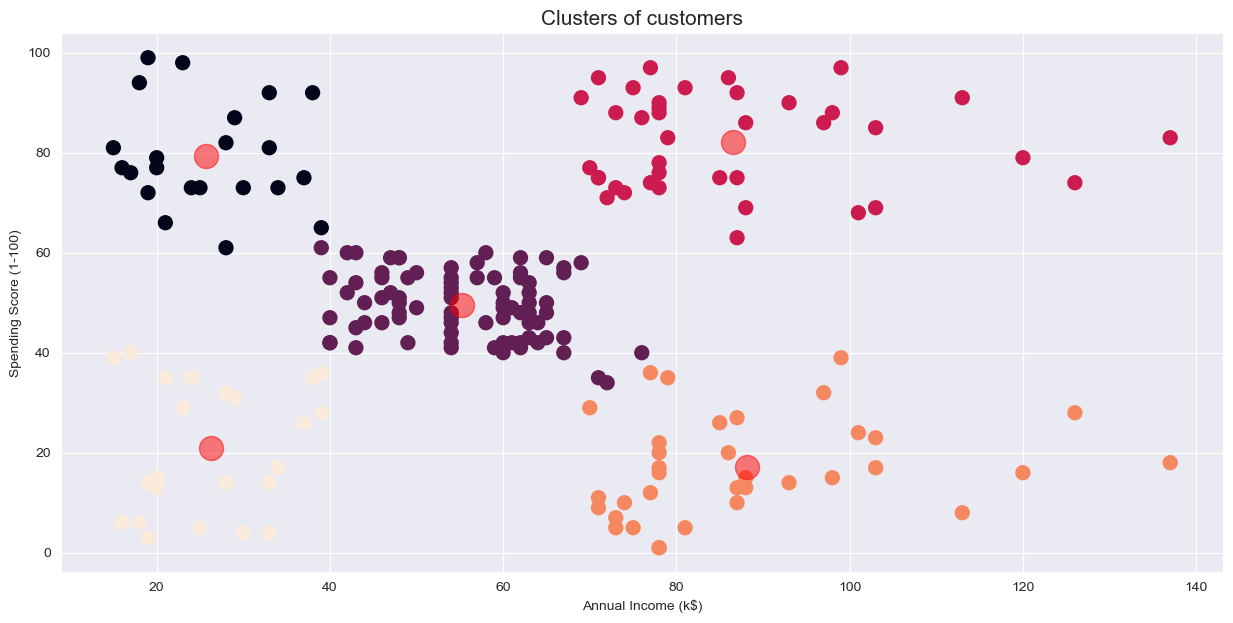

In [28]:
# Scatter plot with bright colors
plt.figure(1 , figsize = (15 , 7))

# TODO: Use the scatter method of the plt object to plot the data points with the right parameters
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s = 100, c = algorithm.labels_)

# TODO: Ass centroids to the plot with the right parameters
plt.scatter(x = centroids[: , 0], y = centroids[: , 1], s = 300, c = 'red', alpha = 0.5)

plt.title('Clusters of customers', fontsize = 15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [29]:
# This code creates a mesh grid of the data points found in X_2D[:, 0] and X_2D[:, 1] with a step size of h (in this case 0.02).
# The mesh grid is then used to predict the output of the algorithm for each point on the grid.
# The result is stored in the Z variable.

h = 0.02

# Get the minimum and maximum values of the data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid of all the points in the plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

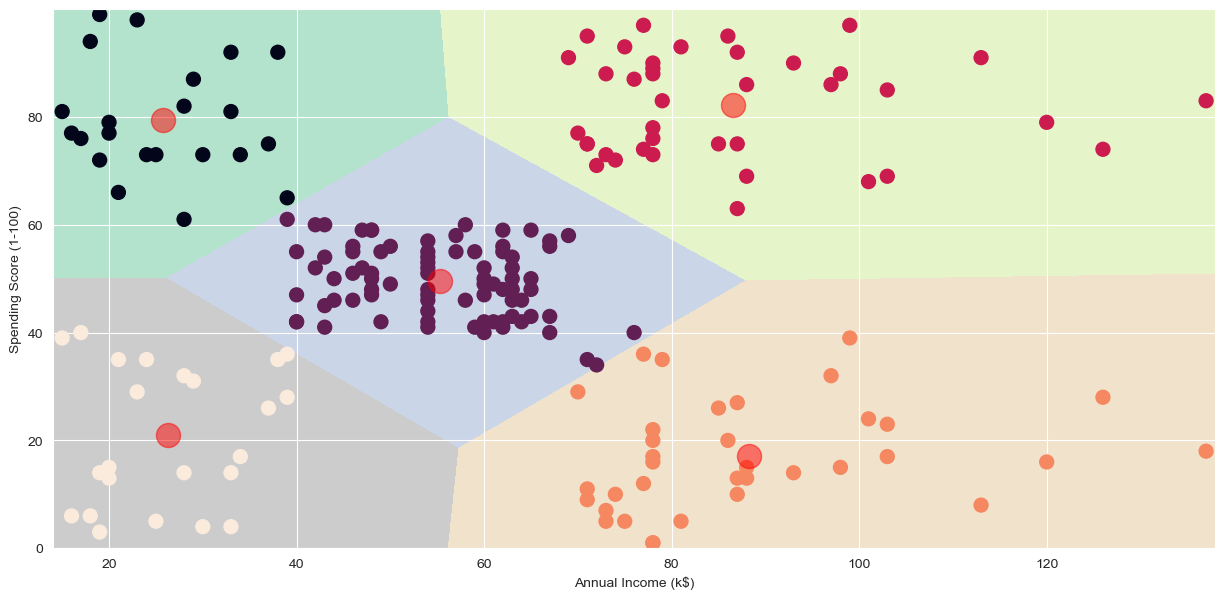

In [30]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels , 
            s = 100 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### MOODLE QUIZ - QUESTION 2

In [31]:
# New point to predict the cluster it belongs to
# where the first value is the annual income and the second value is the spending score
new_point = np.array([[20, 80]])

# Predict the cluster of the new point
new_point_label = algorithm.predict(new_point)
new_point_label

# Display the predicted cluster
print('The new point belongs to cluster number {}'.format(new_point_label[0]))

# Print coordinates of the new point and the centroid of the cluster it belongs to
print('The centroid of the cluster it belongs to is {}'.format(centroids[new_point_label]))

The new point belongs to cluster number 0
The centroid of the cluster it belongs to is [[25.72727273 79.36363636]]
